#Definindo tabuleiro

Para o tabuleiro, foi pensado em dividir as jogadas em um vetor representando as linhas horizontais e outro representando as linhas verticais.

o número de jogadas válidas está em função da dimensão do tabuleiro(D), exemplo:

*   7x7 => D = 7
*   4x4 => D = 4

A função que representa o número de jogadas em uma partida é:
> 2*(D² - D)

E o número máximo de pontos:

> (D - 1)²

representaremos as linhas na vertical por: V; e na horizontal por: H

O tabuleiro em si armazenará a contagem de pontuação, ou seja, só os quadrados formados por cada jogador.

In [ ]:
#Função que recebe a dimensão do tabuleiro e se é ou não o tabuleiro que está sendo iniciado, inicia os vetores e retorna a respectiva tupla
def initPlayeds(d, tab = True):
  temp = []
  # If ternário que verifica se é o tabuleiro ou não
  # Caso seja o tabuleiro ele atribui a quantidade de pontos para a tupla
  # se não ele atribui a quantidade de jogadas válidas para a tupla
  iterator = (d - 1)**2 if tab else d**2 - d
  for i in range(iterator):
    temp.append(0)
  return tuple(temp)


In [ ]:
# Função que define quem ganhou ou se ainda não se sabe
def winner(tab):
  #Soma todos os pontos já feitos
  soma = sum(x for x in tab)
  #Verifica se existe 0 na pontuação (pois se tiver 0 quer dizer que o jogo ainda não terminou)
  #Ou se a soma da pontuação foi igual a 0, que significa que está empatado
  if 0 in tab or soma == 0:
    return 0
  #Se a soma for maior que 0, o jogador 1 venceu
  elif soma > 0:
    return 1
  # Se não, foi o jogador 2
  else:
    return -1

In [ ]:
#Função que define as jogadas válidas de um "array"(Lista) e retorna apenas os index que ainda são válidos
def getValidList(array):
  temp = []
  for i in range(len(array)):
    if array[i]==0:
      temp.append(i)
  return temp;

In [ ]:
#Função que define todas as jogadas válidas no tabuleiro
def get_valid_moves(h,v):
  valids = []
  valids.append(getValidList(h))
  valids.append(getValidList(v))
  return valids

In [ ]:
#função recebe uma lista e retorna um item de forma aleatória
def randomLst(lst):
  return random.choice(lst)

In [ ]:
import random
#Definindo o player que joga ao acaso, ele recebe a lista de jogadas na horizontal, a lista de jogadas na vertical e por ultimo qual é a jogada que ele está fazendo;
def player(tab,turn):
  #Chamamos a função que retorna todas as jogadas válidas do tabuleiro
  validmove = get_valid_moves(tab[0],tab[1])
  esc = []
  #Se existe jogadas válidas na horizontal ele adiciona 0 à escolha
  """
    0 -> indica que é possível realizar jogadas de linhas horizontais
    1 -> indica que é possível realizar jogadas de linhas verticais
  """
  if validmove[0]:
    esc.append(0)
  if validmove[1]:
    esc.append(1)
  # Se a escolha não estiver vazia, quer dizer que ainda existem jogadas válidas
  if esc:
    #Escolhe se irá fazer uma jogada na horizontal ou na vertical
    HorVert = randomLst(esc)
    # Retorna uma lista, onde o primeiro item representa se a linha será vertical ou na horizontal e o segundo item representa qual foi a jogada escolhida
    # e também retorna quem fez a jogada
    return (HorVert,randomLst(validmove[HorVert])),turn
  #Caso não tenha nenhuma jogada válida, a função retorna 0
  return 0

In [ ]:
#Função que tem o mesmo formato do player ao acaso, porém permite a iteração de um jogador humano
def humanPlayer(tab,turn):
  #Chamamos a função que retorna todas as jogadas válidas do tabuleiro
  validmove = get_valid_moves(tab[0],tab[1])
  esc = []
  #Informando ao jogador sobre como o tabuleiro se encontra e qual peça ele está jogando
  print("Sua vez de jogar com as peças: %s"%turn)
  
  #O tabuleiro de pontuação é igual (d-1)^2, 
  #para descobrir a dimensão basta tirar a raiz quadrada do tab de pontuação e somar 1
  d = int ((len(tab[2]) ** 0.5) +1)

  board = drawBoard(d, tab[0], tab[1], tab[2])
  display(board)

  #Se existe jogadas válidas na horizontal ele adiciona 0 à escolha
  """
    0 -> indica que é possível realizar jogadas de linhas horizontais
    1 -> indica que é possível realizar jogadas de linhas verticais
  """
  if validmove[0]:
    esc.append(0)
  if validmove[1]:
    esc.append(1)
  # Se a escolha não estiver vazia, quer dizer que ainda existem jogadas válidas
  if esc:
    #Caso exista jogadas tanto na vertical quando horizontal
    if (len(esc)==2):
        
      HorVert = int (input("Escolha se fará uma linha na vertical(1) ou na horizontal(0): \n"))
      #Verificando se o usuário digitou uma escolha válida
      while HorVert not in [0,1]:
        print("Entrada inválida! digite apenas 1 ou 0.")
        HorVert = int (input("Escolha se fará uma linha na vertical(1) ou na horizontal(0): \n"))
    else:
      print("Só é possível realizar jogada com linha %s!"%("vertical" if esc[0] else "horizontal"))
      HorVert = esc[0]
      
    played = int (input("Jogadas válidas na %s:\n%s: \n"%("vertical" if HorVert else "horizontal",validmove[HorVert])))
    while played not in validmove[HorVert]:
      print("Jogada Inválida!")
      played = int (input("Jogadas válidas na %s:\n%s: \n"%("vertical" if HorVert else "horizontal",validmove[HorVert])))
    #Ao final retorna a jogada e a peça que foi lançada
    return (HorVert,played),turn
  #Caso não haja jogadas válidas retorna 0 e a peça
  return 0,turn

In [ ]:
#Função responsável por verificar se o jogador marcou alguma pontuação
def marcaPonto(h , v, played, tab, d, turn):
  #Dividimos o tabuleiro em 3 partes: as jogadas válidas na vertical, horizontal e a pontuação
  # As jogadas na vertical se dá por uma matriz (d-1) x d; se a dimensão for 4 significa que será uma matriz 3x4
  # As jogadas na horizontal se dá pela matriz d x (d-1), ou seja, 4x3
  # Ao realizar a divisão inteira da jogada pelas colunas da matriz, obtemos o valor correspondente a linha que a jogada se encontra na matriz
  result = played[1] // d if played[0] else played[1] // (d-1)
  resto = played[1] % d if played[0] else played[1] % (d-1)
  point = []

  #Analizando se é na vertical(1)
  if played[0]:
    #Para jogadas na vertical assumimos como verdade que sempre haverá uma linha acima e uma abaixo para formar um quadrado, seja à direita ou à esquerda
    #Verificando se não está na última coluna
    if resto<(d-1):
      # Vericando se já teve uma jogada na coluna da direita e
      # se na linha que está "acima" houve uma jogada e 
      # se na linha que está "abaixo" houve uma jogada
      # Se essas 3 condições forem verdadeiras, significa que acabou de desenhar um quadrado, portanto marcou um ponto
      if v[played[1]+1]!=0 and h[played[1] - result]!=0 and h[played[1] + d - (result + 1)]!=0:
        #O ponto correpondente a linha vertical que se dá em função da jogada - a linha que a jogada se encotra na matriz
        point.append(played[1] - result)
    #Verificando se a coluna não é a primeira
    if resto>0:
      #Verifica se já houve uma jogada na coluna à esquerda e
      # se a linha que está na horizontal acima, já foi preenchida e 
      # se a linha que está na horizontal abaixo já foi preenchida
      # Então formou um quadrado, portanto, marcou um ponto
      if v[played[1]-1]!=0 and h[played[1] - (result+1)]!=0 and h[played[1] + d - (result+2)]!=0:
        #O ponto correpondente a linha vertical que se dá em função da jogada a esquerda - a linha que a jogada se encotra na matriz
        point.append(played[1] - (result+1))
  else:
    #Para jogadas horizontais, assumimos como verdade que sempre haverá uma linha vertical à esquerda e uma a direita para formar um quadrado, seja acima ou abaixo
    #Verificando se não se encontra na última linha
    if result<(d-1):
      #Verificando se houve uma jogada na linha horizontal abaixo e
      # se linha vertical na direita e
      # se linha vertical a esquerda
      #Então marcou um ponto
      if h[played[1]+d-1]!=0 and v[played[1] + result]!=0 and v[played[1] + result + 1]!=0:
        #O ponto correpondente a linha superior do quadrado
        point.append(played[1])
    #Verificando se não se encontra na primeira linha
    if result>0:
      #Verifica se houve jogada acima e
      #jogada a direita acima horizontal e
      #jogada a esquerda acima da linha horizontal
      #Então marcou ponto
      if h[played[1]-(d-1)]!=0 and v[played[1] + result-d]!=0 and v[played[1] + result -(d-1)]!=0:
        #O ponto correpondente a linha horizontal superior
        point.append(played[1]-(d-1))
  #Se não for vazio, significa que pontuou
  if point:
    itab = list(tab)
    for el in point:
      itab[el] = turn
    #atualizamos a tabela de ponto
    tab = tuple(itab)
    #Como pontuou, a vez de jogar continua com ele
    return turn,tab
  #Se não pontuou, troca a vez de jogar
  return -turn,tab

In [ ]:
def game(player1,player2):
  #Variável que representa a dimensão do tabuleiro
  d = 4
  #Atribuindo a quantidade de jogadas válidas tanto na vertical quanto na horizontal
  v = initPlayeds(d,tab = False)
  h = v
  #Atribuindo o número de pontuações que podem ser adquiridas para o tabuleiro
  tab = initPlayeds(d)
  turn = 1
  result = 0
  history = []
  #O jogo só termina quando todos os pontos forem preenchidos
  while 0 in tab:
    played, piece = None,None
    if turn==1:
      played,piece = player1((h,v,tab),turn)
    else:
      played,piece = player2((h,v,tab),turn)
    #Se a jogada for uma tupla, significa que ainda houve jogadas a serem realizadas
    if type(played)==tuple:
      #Atualizando o tabuleiro
      if played[0]:
        itab = list(v)
        itab[played[1]] = piece
        v = tuple(itab)
      else:
        itab = list(h)
        itab[played[1]] = piece
        h = tuple(itab)
      #Verificando se o jogador marcou um ponto e verificando quem será o próximo a realizar uma jogada
      turn,tab = marcaPonto(h,v,played,tab,d,turn)
      #Atualizando o histórico
      history.append(((h,v),tab))
  #Guardando o resultado da partida, para tabuleiros com dimensão impar é possível haver empate
  result = winner(tab)

  return result,history

In [ ]:
def championship(player1, player2, countMatch = 1000):
  results = [0,0,0]
  knowledge = {}
  
  for i in range(countMatch) :
    result, history = game(player1, player2)
    results[result] += 1

    ## Adicionando as jogadas no histórico
    for tab in history :
      if not tab in knowledge :
        knowledge[tab] = [0, 0, 0]
      knowledge[tab][result] += 1

  return tuple(results),knowledge

In [ ]:
from PIL import Image, ImageDraw, ImageFont

def drawBoard(d, tabH, tabV, tabP):
  board = Image.new("RGB", (d*50,d*50), (255,255,255))
  draw = ImageDraw.Draw(board)

  #desenha os pontos do tabuleiro
  for i in range(d):
    for j in range(d):
      draw.ellipse([(i*50, j*50), (i*50+7, j*50+7)], fill=(0,0,0))

  #len(tabH) == len(tabV)
  for i in range(len(tabH)):
    if tabH[i]:
              # 0 representa uma linha horizontal
      drawLine([0,i], tabH[i], d, draw)

    if tabV[i]:
              # 1 representa uma linha vertical
      drawLine([1,i], tabV[i], d, draw)

    #somente se alguma das duas posicoes estiverem livres ele desenha a posicao
    if not tabH[i] or not tabV[i]:
      drawPosition(i, d, draw, [tabH[i], tabV[i]])

  #desenha no tabuleiro os pontos presentes
  for i in range(len(tabP)):
    if tabP[i]:
      drawScore(str (tabP[i]), i, d, draw)

  return board

In [ ]:
def drawPosition(text, d, draw, status):
  fonte = ImageFont.truetype("/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf",10)

  #largura e altura do texto
  l, a = draw.textsize(str (text), font=fonte)
  
  #calcula qual o deslocamento para ficar no meio de um quadrado de lado = 50
  l = (50 - l) / 2 
  a = (50 - a) / 2

  #posicao horizontal
  if not status[0]:
    #x = (indice % (dimensao-1) * largura do quadrado ) + largura de deslocamento +3 
    #y =  (indice // (dimensao-1) * altura do quadrado)
    draw.text((((text % (d-1) * 50) + l +3),(text // (d-1) * 50)), str (text), fill="grey", font=fonte)
  
  #posicao vertical
  if not status[1]:
    #x = (indice % dimensao * largura do quadrado )
    #y =  (indice // dimensao * altura do quadrado) + altura de deslocamento
    draw.text(((text % d * 50),(text // d * 50) + a), str (text), fill="black", font=fonte)

In [ ]:
def drawLine(played, turn, d, draw):
  row = played[1] // d if played[0] else played[1] // (d-1)
  column = played[1] % d if played[0] else played[1] % (d-1)

  color = (52, 92, 235) if turn < 0 else (235, 52, 70)

  if played[0]:
    #linha vertical
              #este valor de +3 é apenas por questão de alinhamento
    draw.line([(column*50+3, row*50), (column*50+3, row*50+55)], fill=color, width=3) #v
  else:
    #linha horizontal
    draw.line([(column*50, row*50+3), (column*50+55, row*50+3)], fill=color, width=3) #h

In [ ]:
def drawScore(text, cord, d, draw):
  fonte = ImageFont.truetype("/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf",20)
  
  # encontra o tamanho da largura e a altura do texto  
  l, a = draw.textsize(text, font=fonte)

   # x = (largura do quadrado - largura do texto) / 2 + (indice do quadrado % dimensao-1) * area 
  x = ((50-l) / 2) + (cord % (d-1)) *50
  # y = (altura do quadrado - altura do texto) / 2 + (indice do quadrado // dimensao-1) * area 
  y = ((50-a) / 2) + (cord // (d-1)) *50

  draw.text((x,y), text, fill="black", font=fonte)

In [ ]:
from ipywidgets import interact

def generate_image_history(d, history) :
    image_history = []
    for i in range(len(history)) :
        image_history.append(drawBoard(d, history[i][0][0], history[i][0][1], history[i][1]))
    return image_history

In [ ]:
def display_sequence(images) :
    def _show(frame=(0, len(images)-1)) :
        return images[frame]
    return interact(_show)

In [ ]:
#Jogador ao acaso contra outro jogador ao acaso
result,history = game(player,player)

images = generate_image_history(4, history)
display_sequence(images)


total = len(history[len(history)-1][1])
points = history[len(history)-1][1].count(result) if result else total//2
print("%s\nPontuação: %s de %s"%("Jogador 1 ganhou" if result==1 else "jogador 2 ganhou" if result else "empatou",points,total))


interactive(children=(IntSlider(value=11, description='frame', max=23), Output()), _dom_classes=('widget-inter…

Jogador 1 ganhou
Pontuação: 5 de 9


#Como jogar:
O tabuleiro foi representado da seguinte maneira:
* (Para a representação, foi analisado um tabuleiro 4x4)


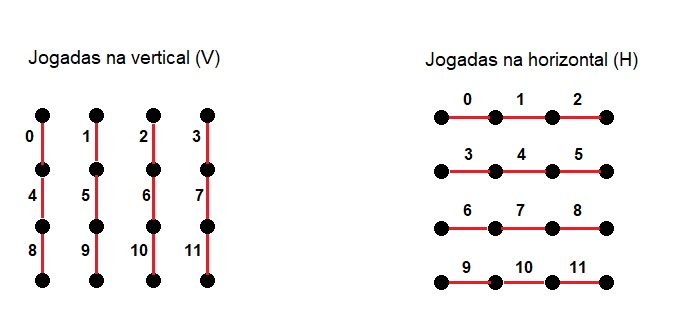
* Quando as jogadas na horizontal junto com a vertical formam um quadrado, o jogador marca um ponto, que é dado pelo seguinte tabuleiro:
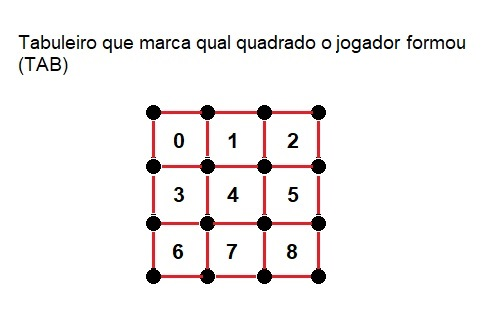

In [ ]:
#Jogador ao acaso contra jogador humano

result,history = game(player,humanPlayer)
total = len(history[len(history)-1][1])
points = history[len(history)-1][1].count(result) if result else total//2
print("%s\nPontuação: %s de %s"%("Jogador 1 ganhou" if result==1 else "jogador 2 ganhou" if result else "empatou",points,total))


images = generate_image_history(4, history)
display_sequence(images)

In [ ]:
results, knowledge = championship(player, player, countMatch = 1000)
# Análise do resultado do jogador ao acaso como player 1 e 2 no formato => (Empate, player1Wins, player2Wins)
print(results)
# Quantidade de tabuleiros gerados
print(len(knowledge))

In [ ]:
def generate_rl_player(state_values, epsilon) :
  def player(tab, turn) :
    validmove = get_valid_moves(tab[0],tab[1])
    esc = []
    
    if validmove[0]:
      esc.append(0)
    if validmove[1]:
      esc.append(1)

    epsilon_random = random.random()
    if esc:
     
      if epsilon_random < epsilon :
        HorVert = randomLst(esc)
      
        return (HorVert,randomLst(validmove[HorVert])),turn
      else :       
        
        scores = []
        next_state = [list(tab[0]),list(tab[1]),list(tab[2])]
        for escolha in esc:

          for move in validmove[escolha] :
            next_state[escolha][move] = turn


            scores.append(state_values.get((tuple(next_state[0]),tuple(next_state[1]),tuple(next_state[2])), 0))
            
        best_score = None
        if (turn == 1) :
            best_score = max(scores)
        else :
            best_score = min(scores)
            
        best_moves = []
        count_playeds = len(validmove[esc[0]==[]])
        j = 0
        k = 0
        for i in range(len(scores)) :  
          if scores[i] == best_score :
            if i<count_playeds:
              j = 0
              k = i
            else:
              j = 1
              k = i-count_playeds
            val = validmove[j][k]
            best_moves.append((j,val))
            
            
        return random.choice(best_moves),turn
    
    return None,None
  return player

In [ ]:
def rewards(tab,last) :
  pontos = 0
  if tab[-1]!=last[-1]:
    pontos = 1 if tab.count(1) != last.count(1) else -1
  return winner(tab[-1])+pontos


In [ ]:
def update_state_values_monte_carlo(values, rewards, amostra, gamma = 0.9, alpha = 0.1) :
  
    discounted_return = 0
    next_state        = amostra[-1]

    last = next_state
    for state in reversed(amostra[:-1]) :
      
        reward = rewards(next_state,last)
        discounted_return = gamma*discounted_return + reward
        
        values[state] = values.get(state,0) + alpha*(discounted_return - values.get(state, 0))
        last = next_state
        next_state = state

    return state_values

In [ ]:
gamma  = 0.999
alpha  = 0.001
state_values = {}
player_rl = generate_rl_player(state_values, 1)

ITERACOES = 2000

for i in range(ITERACOES) :
  random_prob = max(0.01, (ITERACOES - i)/ITERACOES) 

  _, amostra = game(player_rl, player_rl)
  state_values = update_state_values_monte_carlo(state_values, rewards, amostra, gamma, alpha)
  player_rl = generate_rl_player(state_values, random_prob)
  print(i)

player_rl = generate_rl_player(state_values, 0)


In [ ]:
results,_ = championship(player, player_rl)
print("Draw = %i, Acaso = %i, RL = %i" % results)

results,_ = championship(player_rl, player)
print("Draw = %i, RL = %i, Acaso = %i" % results)

In [ ]:
#Jogador inteligente contra jogador humano

result,history = game(player,humanPlayer)
total = len(history[len(history)-1][1])
points = history[len(history)-1][1].count(result) if result else total//2
print("%s\nPontuação: %s de %s"%("Jogador 1 ganhou" if result==1 else "jogador 2 ganhou" if result else "empatou",points,total))